#Object Detection using imageAI

![imageAI](https://raw.githubusercontent.com/OlafenwaMoses/ImageAI/master/logo1.png)

## ติดตั้งโปรแกรม imageAI

In [0]:
!pip install imageai --upgrade 

     |████████████████████████████████| 184kB 8.3MB/s 


In [0]:
import tensorflow as tf
import cv2
import keras
import matplotlib.pyplot as plt 

Using TensorFlow backend.


## เรียกใช้ google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls '/content/drive/My Drive/Colab Notebooks/2-2562-DIP'

EAST-Text-Detector.ipynb  image-05.ipynb	      start-imaegai.ipynb
Grade			  image-05xx.ipynb	      text-image
image-01.ipynb		  image2.jpg		      YOLO-Text-Detection.ipynb
image-02.ipynb		  ImageAI.ipynb		      yolo-tiny.h5
image-03.ipynb		  new-york.jpg
image-04.ipynb		  search-text-in-image.ipynb


person  :  58.40646028518677  :  [170, 104, 285, 296]
--------------------------------
person  :  62.51212954521179  :  [412, 120, 567, 282]
--------------------------------
person  :  84.35078859329224  :  [307, 169, 384, 256]
--------------------------------


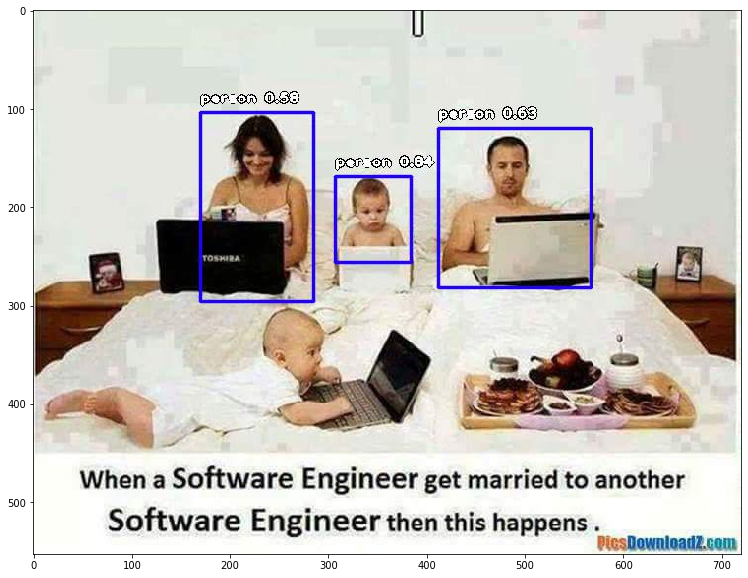

In [0]:
from imageai.Detection import ObjectDetection
import os
import matplotlib.pyplot as plt

execution_path = os.getcwd()

detector = ObjectDetection()

path = '/content/drive/My Drive/Colab Notebooks/2-2562-DIP/'
source_img = path + 'image2.jpg'
source_tinyyolo = path + 'yolo-tiny.h5'
source_yolo = path + 'yolo.h5'

#detector.setModelTypeAsYOLOv3()
#detector.setModelPath( os.path.join(execution_path , source_yolo))

detector.setModelTypeAsTinyYOLOv3()
detector.setModelPath(os.path.join(execution_path , source_tinyyolo))

# ระบุวัตถุที่ต้องการค้นหา
custom = detector.CustomObjects(person=True, dog=True)

detector.loadModel()
detections = detector.detectCustomObjectsFromImage(custom_objects=custom, input_image=os.path.join(execution_path , source_img), output_image_path=os.path.join(execution_path , "image2new.jpg"), minimum_percentage_probability=30)

for eachObject in detections:
    print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
    print("--------------------------------")

# แสดงผลลัพธ์
img = cv2.imread('/content/image2new.jpg')
#img = cv2.imread(path+'image2new.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

## จำนวน Object ที่ค้นพบ

In [0]:
print(len(detections))

3


## แสดง Object ที่ค้นเจอ

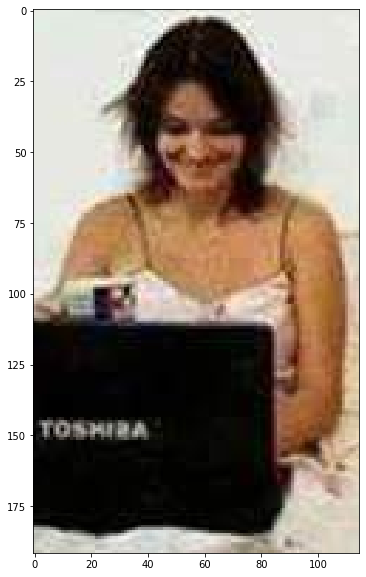

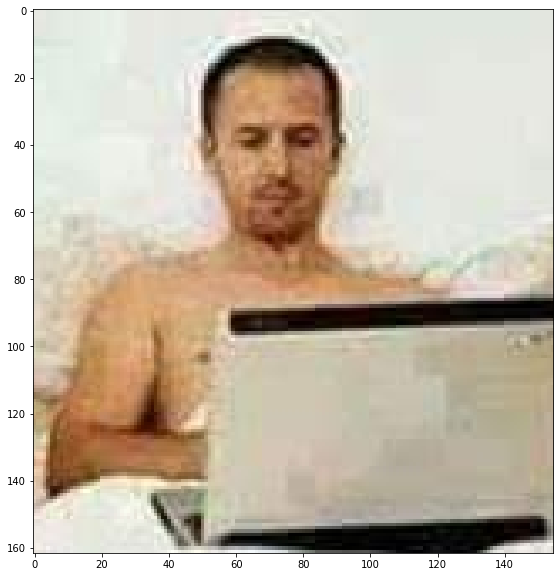

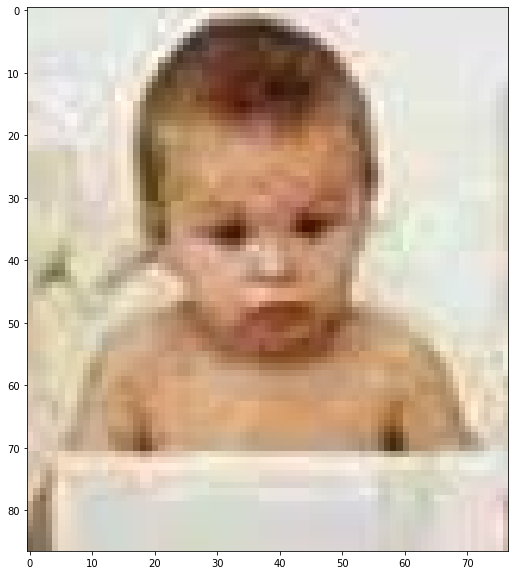

In [0]:
#170, 104, 285, 296
#print(detections[0]['box_points'])
img = cv2.imread(source_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for i in range(0, len(detections)):
  x1 = detections[i]['box_points'][0]
  y1 = detections[i]['box_points'][1]
  x2 = detections[i]['box_points'][2]
  y2 = detections[i]['box_points'][3]
  
  plt.figure(figsize=(15,10))
  plt.imshow(img[y1:y2,x1:x2])
  plt.show()
